<a href="https://colab.research.google.com/github/Naveengowtham2003/mini-Machine-Learning-Projects/blob/main/Algorithm_Analysis_Heart_disease_UCI_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import kagglehub
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

In [4]:
data_path = kagglehub.dataset_download("mragpavank/heart-diseaseuci")

100%|██████████| 3.40k/3.40k [00:00<00:00, 2.71MB/s]

Extracting files...


In [5]:
downloaded_file = os.path.join(data_path, "heart.csv")
downloaded_file

'/root/.cache/kagglehub/datasets/mragpavank/heart-diseaseuci/versions/1/heart.csv'

In [6]:
df = pd.read_csv(downloaded_file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
X = df.drop(columns=["target"])
y = df["target"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

In [25]:
metrics = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None  # Probability scores


    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

In [30]:

ann_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)


y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype(int)
y_prob_ann = ann_model.predict(X_test_scaled)


metrics["Deep Learning (ANN)"] = {
    "Accuracy": accuracy_score(y_test, y_pred_ann),
    "Precision": precision_score(y_test, y_pred_ann),
    "Recall": recall_score(y_test, y_pred_ann),
    "F1 Score": f1_score(y_test, y_pred_ann),
    "ROC AUC": roc_auc_score(y_test, y_prob_ann),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_ann)
}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [33]:
metrics

{'Logistic Regression': {'Accuracy': 0.8524590163934426,
  'Precision': 0.84375,
  'Recall': 0.8709677419354839,
  'F1 Score': 0.8571428571428571,
  'ROC AUC': np.float64(0.9150537634408602),
  'Confusion Matrix': array([[25,  5],
         [ 4, 27]])},
 'Random Forest': {'Accuracy': 0.819672131147541,
  'Precision': 0.8571428571428571,
  'Recall': 0.7741935483870968,
  'F1 Score': 0.8135593220338984,
  'ROC AUC': np.float64(0.9118279569892472),
  'Confusion Matrix': array([[26,  4],
         [ 7, 24]])},
 'SVM': {'Accuracy': 0.8360655737704918,
  'Precision': 0.8620689655172413,
  'Recall': 0.8064516129032258,
  'F1 Score': 0.8333333333333334,
  'ROC AUC': None,
  'Confusion Matrix': array([[26,  4],
         [ 6, 25]])},
 'KNN': {'Accuracy': 0.819672131147541,
  'Precision': 0.8571428571428571,
  'Recall': 0.7741935483870968,
  'F1 Score': 0.8135593220338984,
  'ROC AUC': np.float64(0.8634408602150537),
  'Confusion Matrix': array([[26,  4],
         [ 7, 24]])},
 'Naive Bayes': {'Acc

In [31]:
accuracy_df

,Accuracy
Logistic Regression,0.852459
Random Forest,0.819672
SVM,0.836066
KNN,0.819672
Naive Bayes,0.852459


<ipython-input-32-f7f741697977>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], palette="viridis")


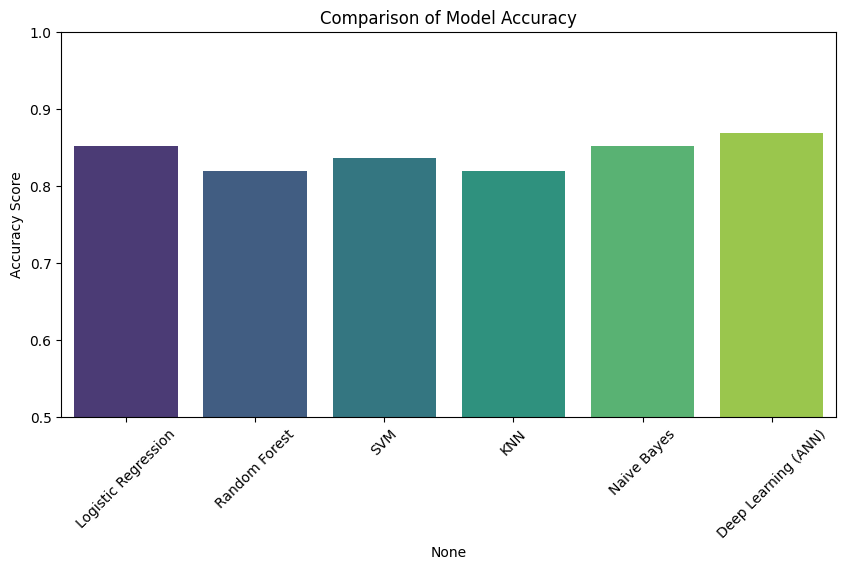

In [32]:
accuracy_df = pd.DataFrame.from_dict(metrics, orient="index")[["Accuracy"]]


plt.figure(figsize=(10, 5))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], palette="viridis")
plt.title("Comparison of Model Accuracy")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.ylim(0.5, 1)
plt.show()

<Figure size 1000x500 with 0 Axes>

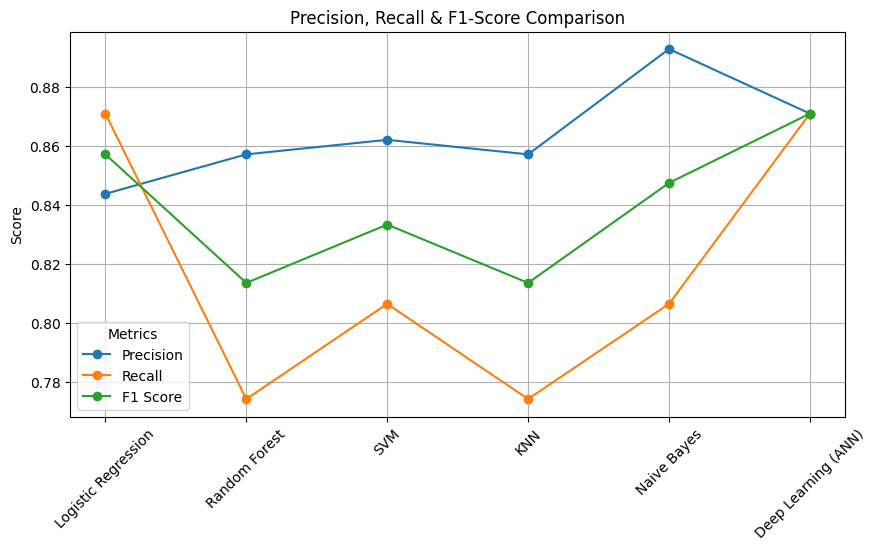

In [34]:
metric_df = pd.DataFrame(metrics).T[["Precision", "Recall", "F1 Score"]]
plt.figure(figsize=(10, 5))
metric_df.plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Precision, Recall & F1-Score Comparison")
plt.ylabel("Score")
plt.xticks(range(len(metric_df.index)), metric_df.index, rotation=45)
plt.legend(title="Metrics")
plt.grid()
plt.show()

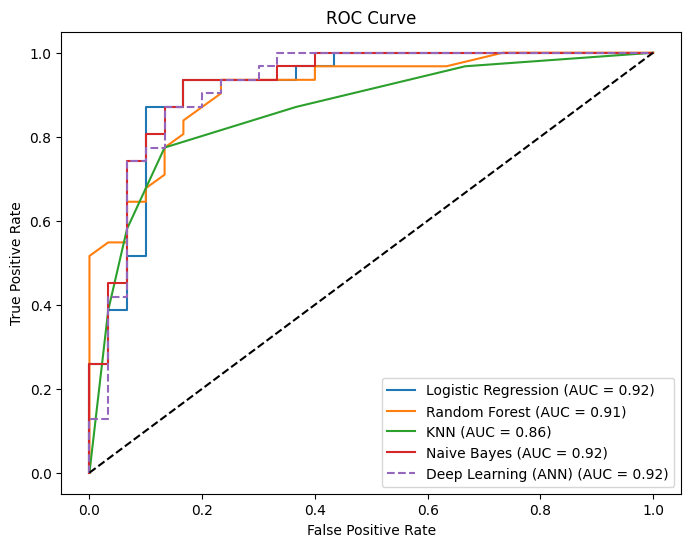

In [35]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics[name]['ROC AUC']:.2f})")


fpr, tpr, _ = roc_curve(y_test, y_prob_ann)
plt.plot(fpr, tpr, label=f"Deep Learning (ANN) (AUC = {metrics['Deep Learning (ANN)']['ROC AUC']:.2f})", linestyle="--")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


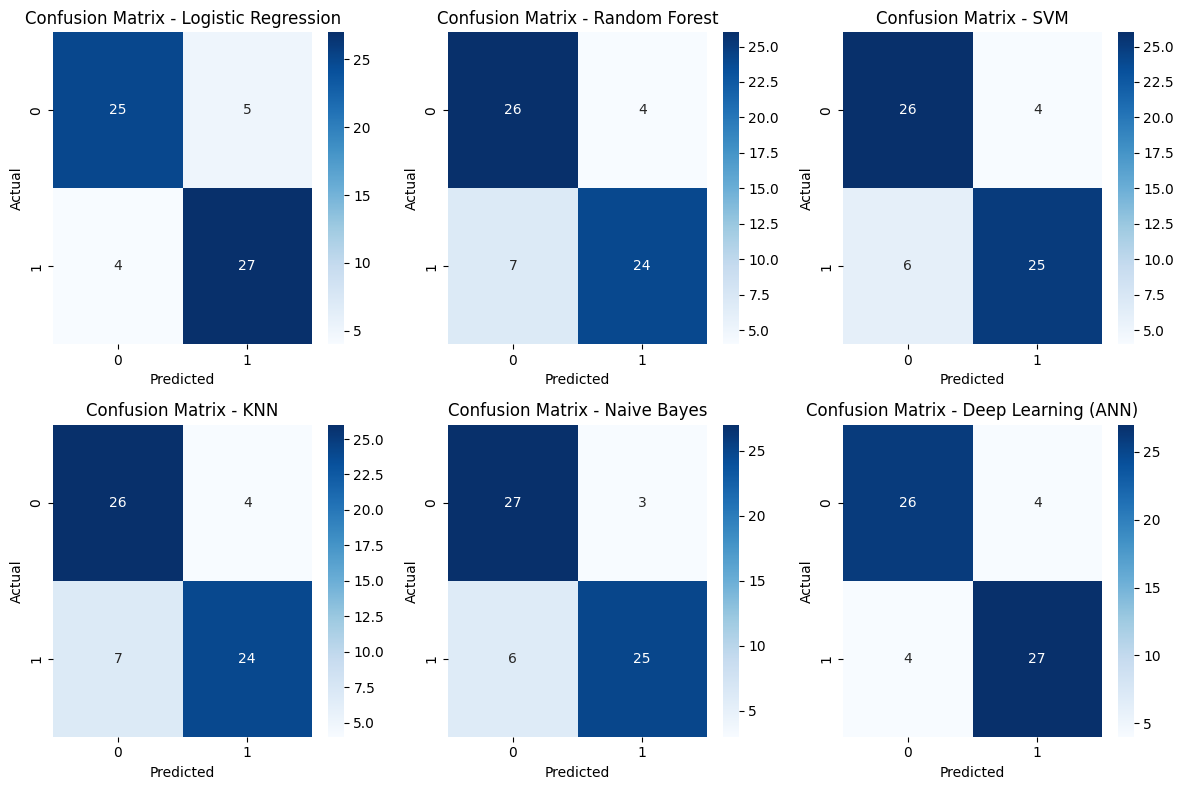

In [36]:
plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(metrics.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(model["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()